<a href="https://colab.research.google.com/github/eduardoheros/statistical-analysis-project/blob/master/An%C3%A1lisis_CTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Para mayor información de esta libreta, consultar la presentación:
##https://drive.google.com/file/d/1Vs_iHKT-nj5laARhlqbW1At0fpCXkEpX/view?usp=sharing

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
plt.style.use("ggplot")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount("/content/drive",force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/Data COLAB"

/content/drive/My Drive/Data COLAB


In [ ]:
data=pd.read_csv("CTG/samples.csv")

In [ ]:
data.head()

,'Elapsed time','FHR','UC'
0,'hh:mm:ss.mmm','bpm','nd'
1,'0:00.000',150.500,7.000
2,'0:00.250',150.500,8.500
3,'0:00.500',151.000,8.500
4,'0:00.750',151.250,7.500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19201 entries, 0 to 19200
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   'Elapsed time'  19201 non-null  object
 1   'FHR'           19201 non-null  object
 2   'UC'            19201 non-null  object
dtypes: object(3)
memory usage: 450.1+ KB


In [ ]:
#paleta de colores
verde="#2ed47b"
azul="#1394F6"
rojo="#f35516"

In [ ]:
##Graficamos la columna de frecuencia cardiaca.Para propósito de ir generando material explicativo para la presentación, no definiremos funciones
data.drop(0,inplace=True)
data.drop("'Elapsed time'",axis=1,inplace=True)
data.columns=["FC","UC"]
index=pd.to_timedelta(np.arange(0,len(data)/4,0.25), unit='s')
data.set_index(index,inplace=True)
data.FC=data.FC.astype(float)
data.UC=data.UC.astype(float)

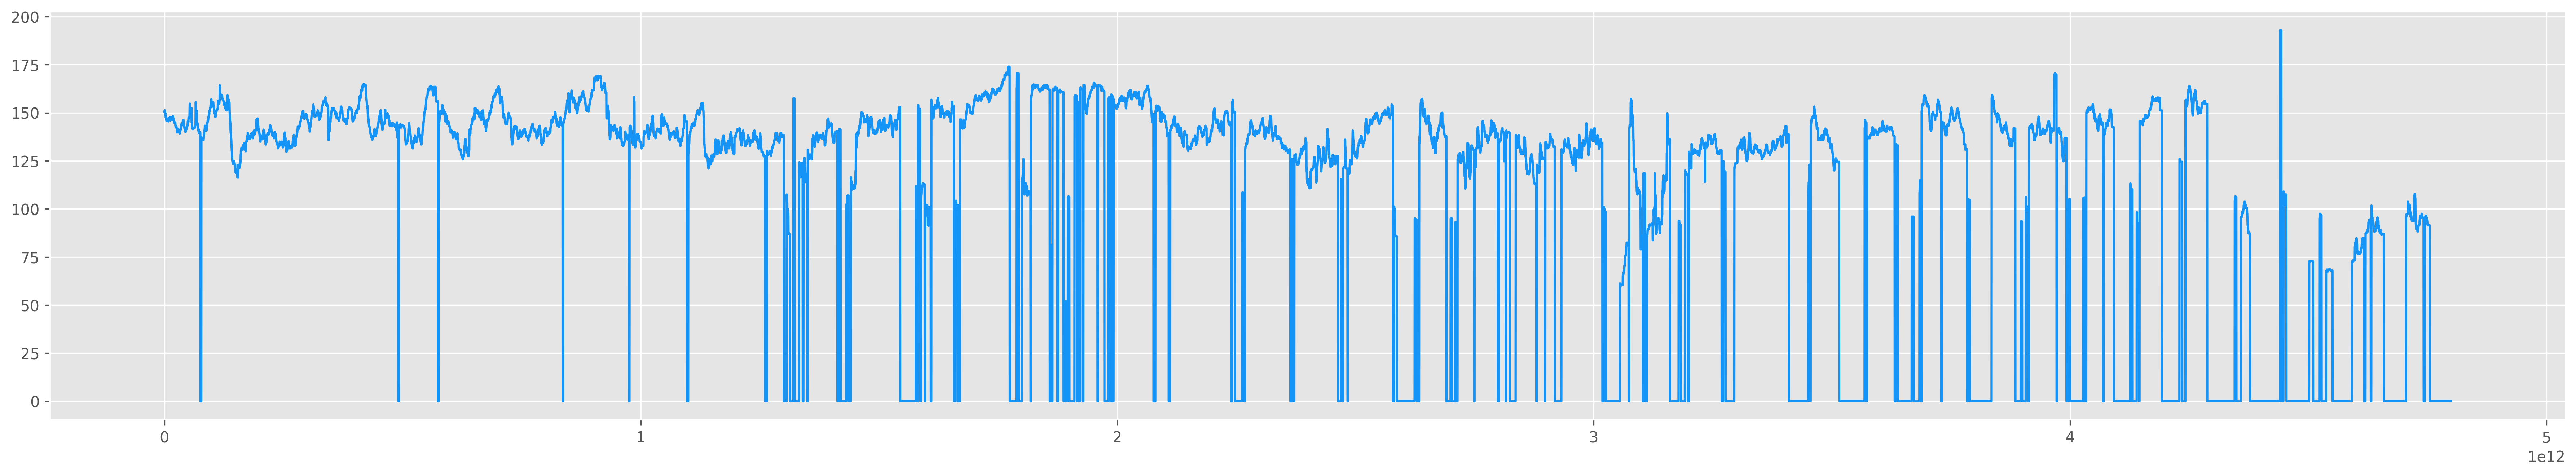

In [ ]:
plt.figure(figsize=(30,5),dpi=300)
plt.plot(data.FC,color=azul);

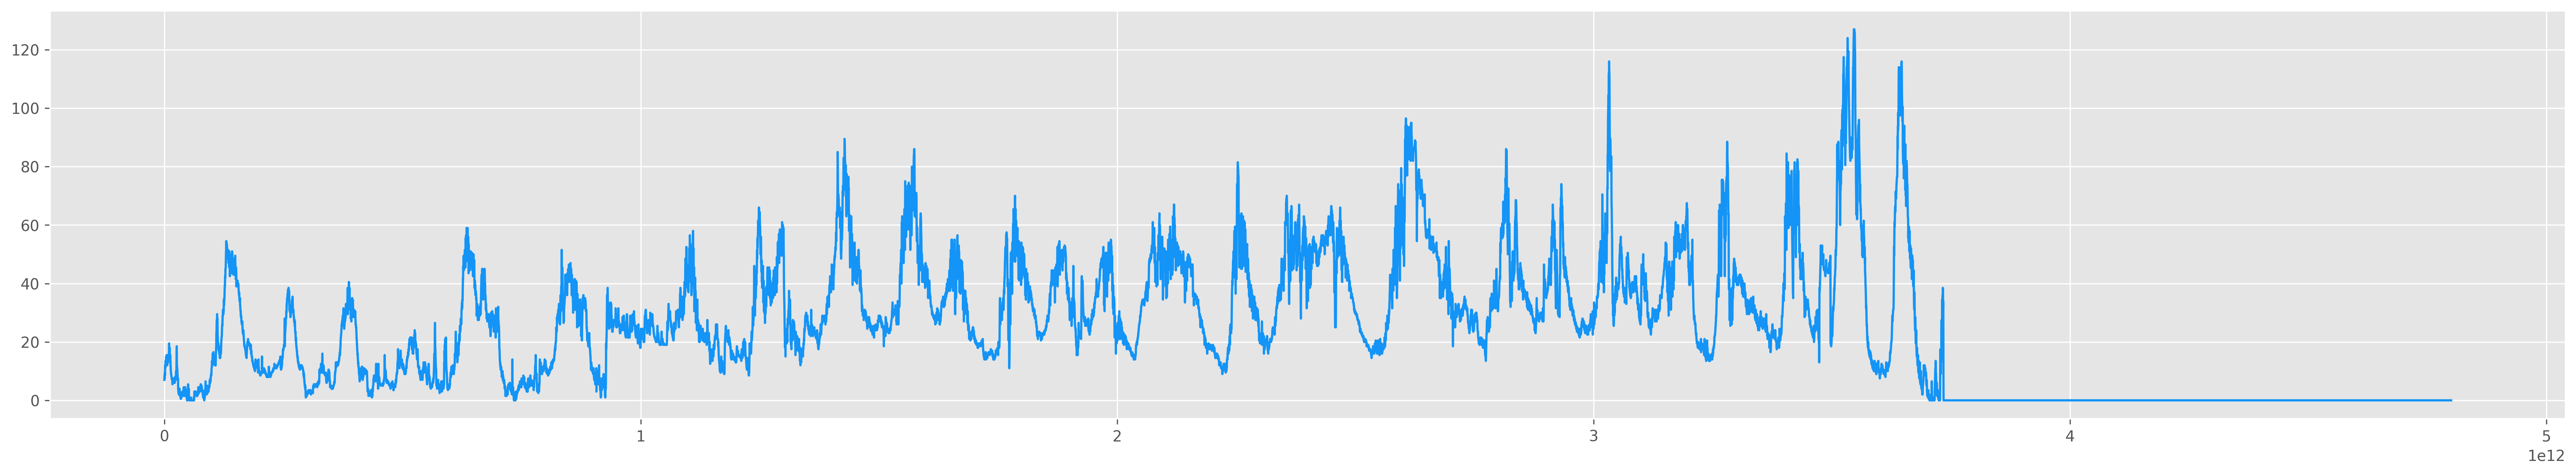

In [ ]:
plt.figure(figsize=(30,5),dpi=300)
plt.plot(data.UC,color=azul);

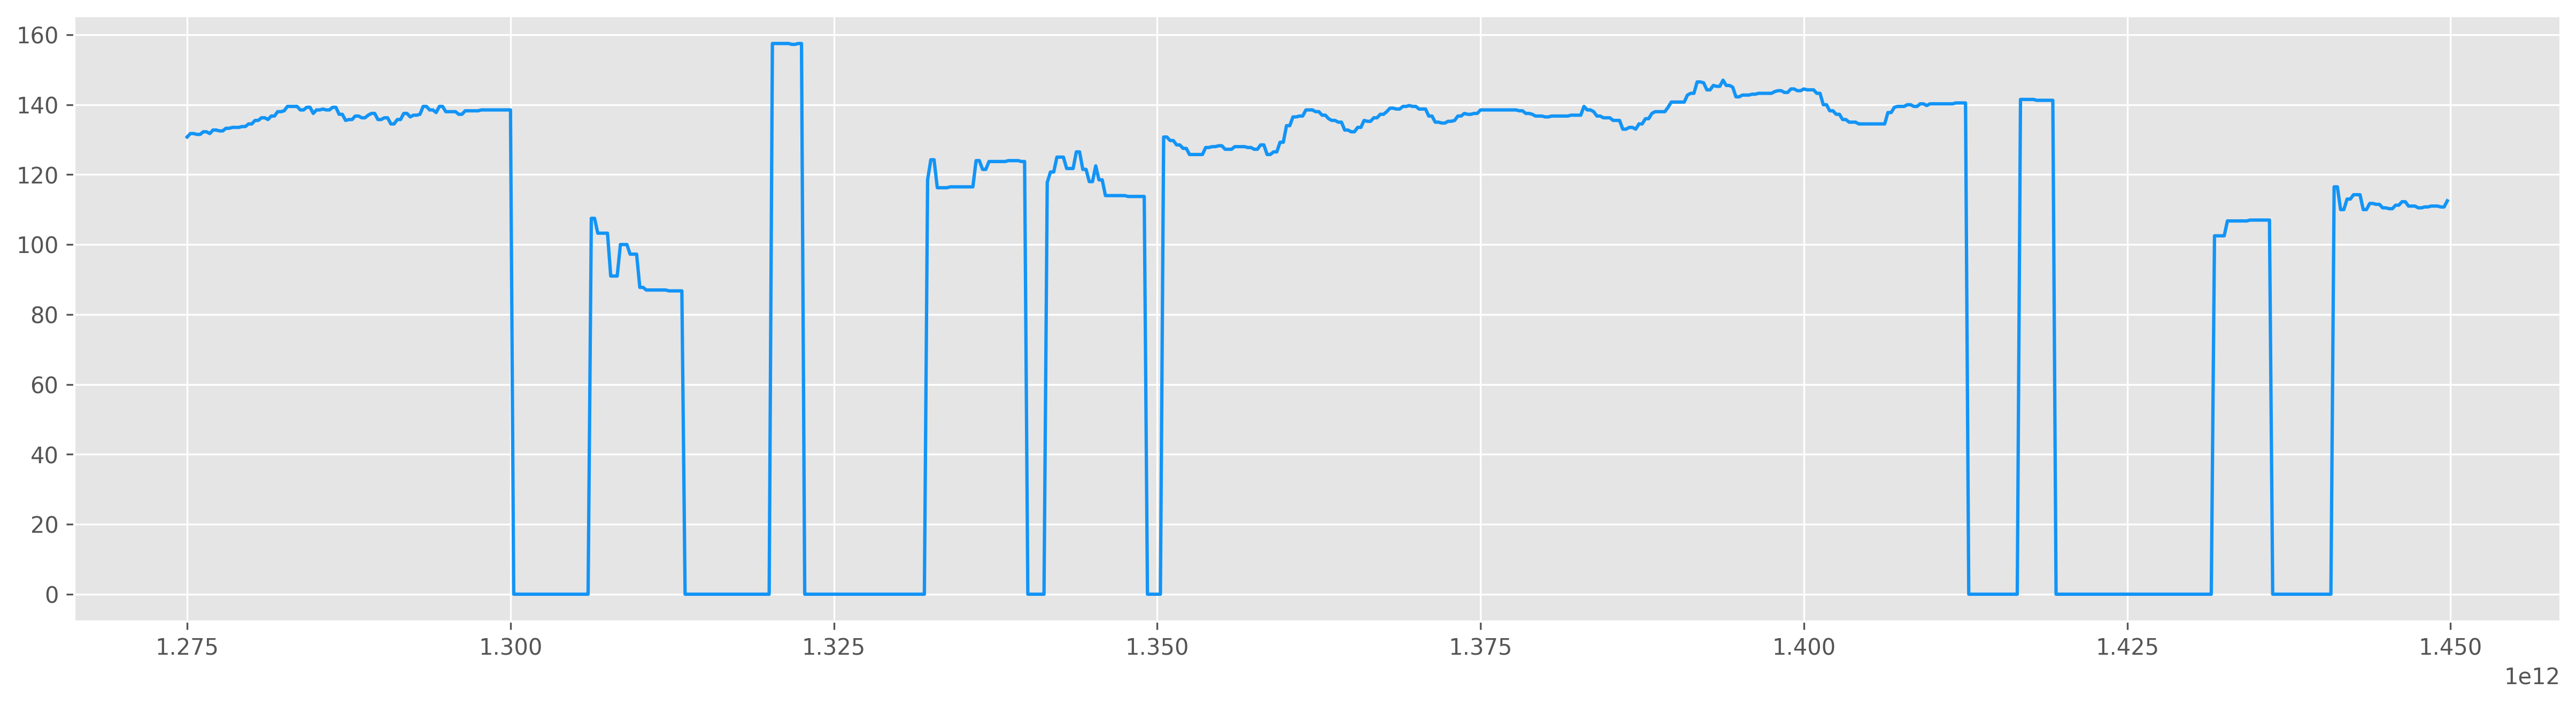

In [ ]:
plt.figure(figsize=(20,5),dpi=300)
plt.plot(data.FC[5100:5800],color=azul);

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(data.UC)

(-5.442233269181296,
 2.7598452006199645e-06,
 37,
 19162,
 {'1%': -3.4306913096869285,
  '10%': -2.5668502915453613,
  '5%': -2.8616908465226594},
 81106.4111264392)

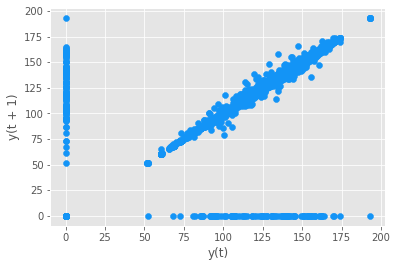

In [ ]:
from pandas.plotting import lag_plot
lag_plot(data.FC,c=azul);

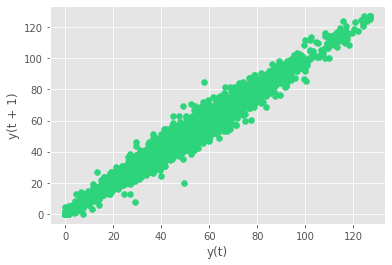

In [ ]:
lag_plot(data.UC,c=verde);

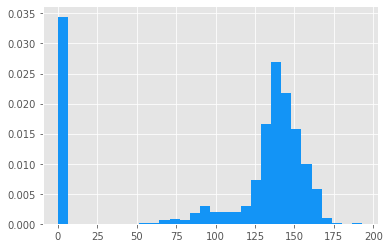

In [ ]:
plt.hist(data.FC,bins=30,density=True,color=azul);

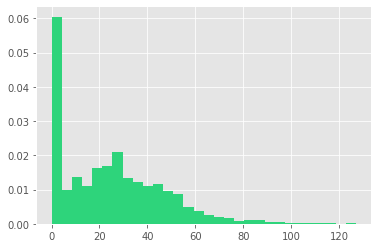

In [ ]:
plt.hist(data.UC,bins=30,density=True,color=verde);

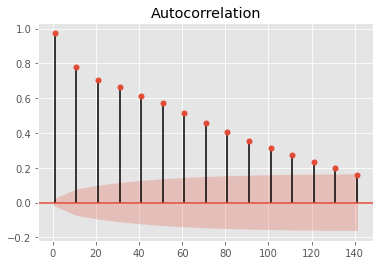

In [ ]:
lags=np.arange(1,150,10)
sm.graphics.tsa.plot_acf(data.FC,lags=lags,alpha=0.01);

In [ ]:
data["first_zeros_UC"]=data.UC.cummax()
data["last_zeros_UC"]=data.UC.iloc[::-1].cummax().iloc[::-1]
data["first_zeros_FC"]=data.FC.cummax()
data["last_zeros_FC"]=data.FC.iloc[::-1].cummax().iloc[::-1]
data["remove"]=data.iloc[:,2:].all(axis=1)
data=data[data.remove==True]
data.FC[data.FC==0]=np.nan

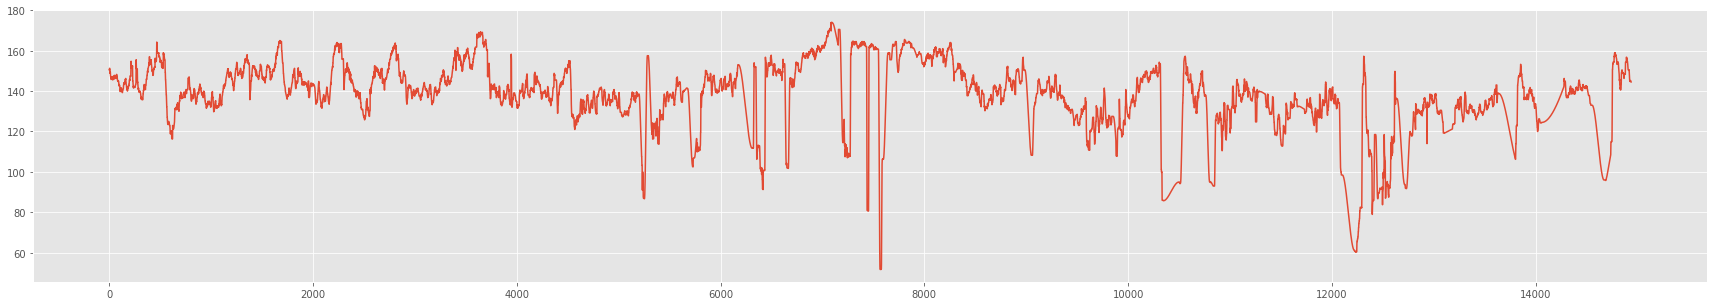

In [ ]:
##Interpolación de valores nulos con método de Akima
index=np.arange(0,len(data),1)
data.index=index
data1=data.FC.interpolate(method="akima")
data1.plot(figsize=(30,5))

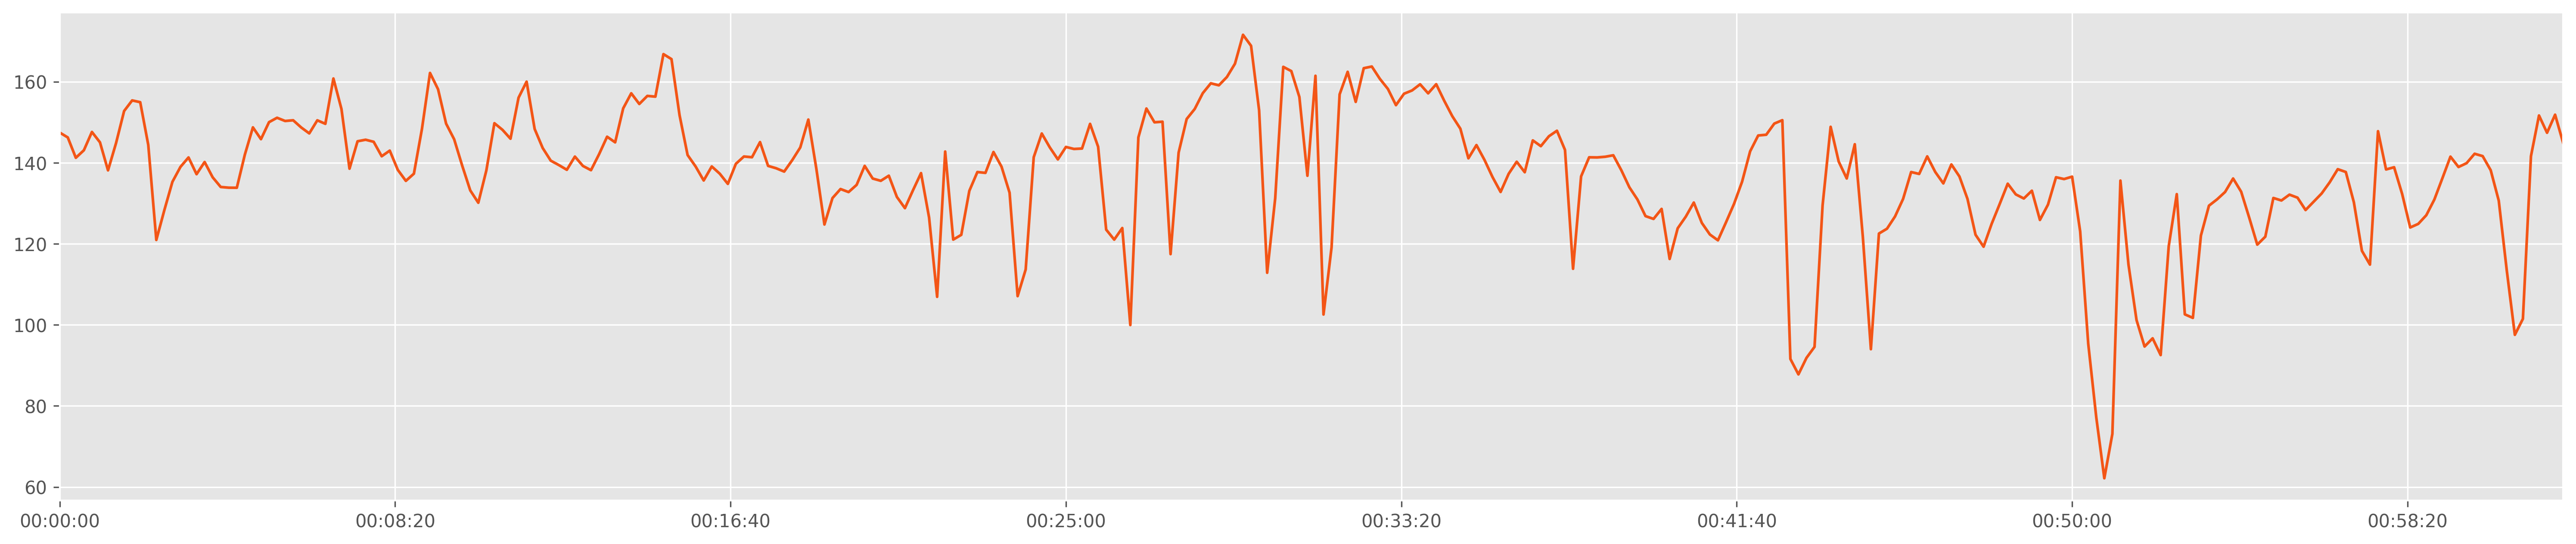

In [ ]:
index=pd.to_timedelta(np.arange(0,len(data1)/4,0.25), unit='s')
data1.index=index
data2=data1.resample("0.2min").mean()
plt.figure(dpi=300)
data2.plot(figsize=(25,5),color=rojo);

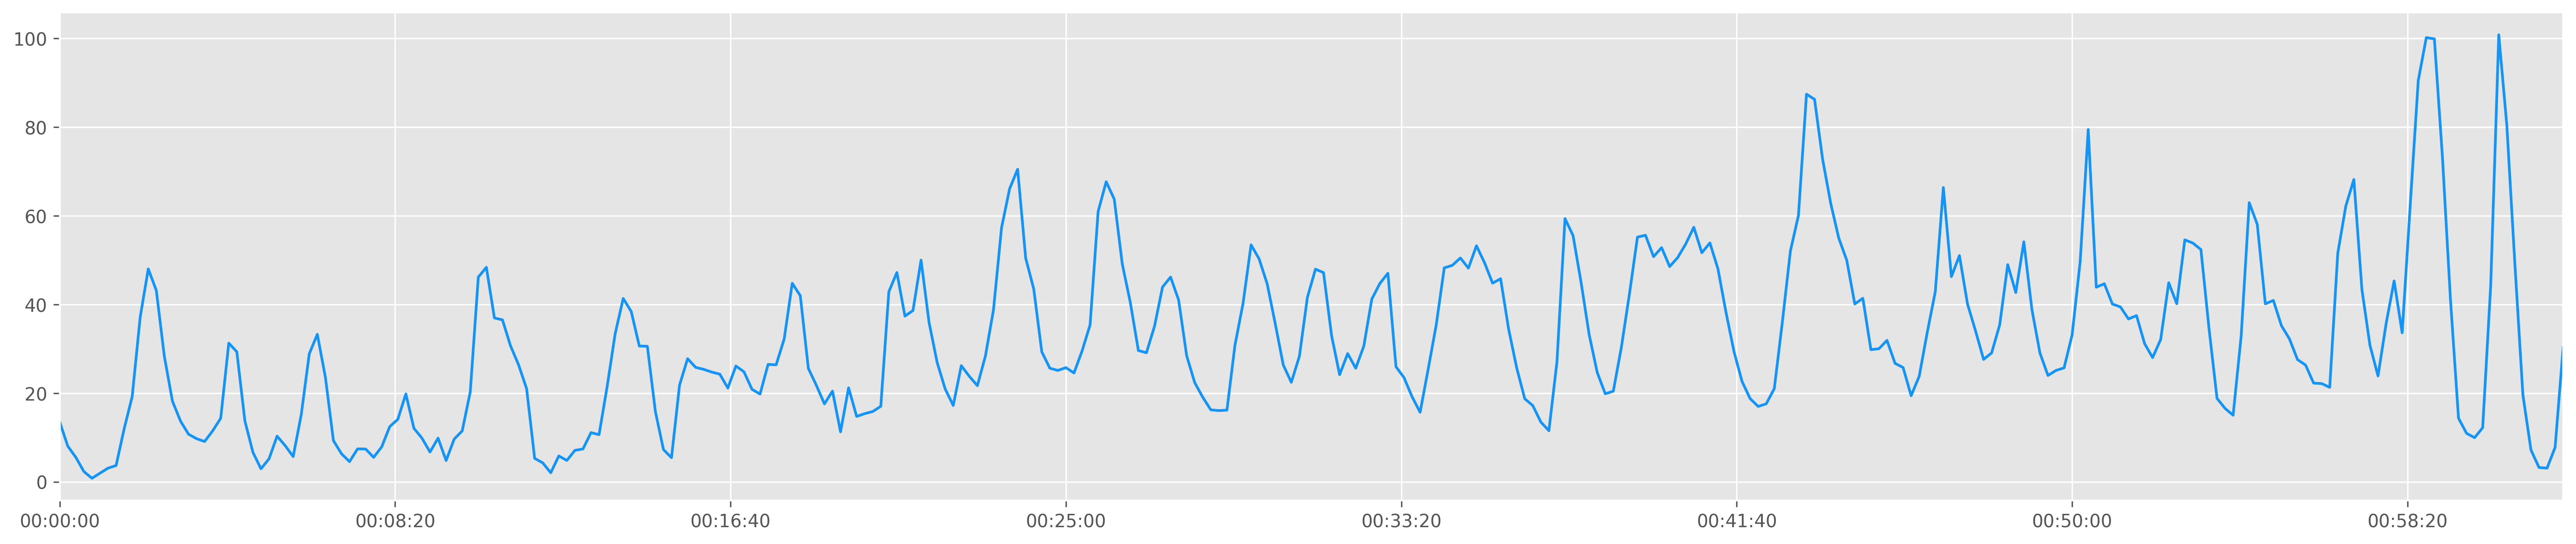

In [ ]:
index=pd.to_timedelta(np.arange(0,len(data)/4,0.25), unit='s')
data.set_index(index,inplace=True)
data3=data.UC.resample("0.2min").mean()
plt.figure(dpi=300)
data3.plot(figsize=(25,5),color=azul);

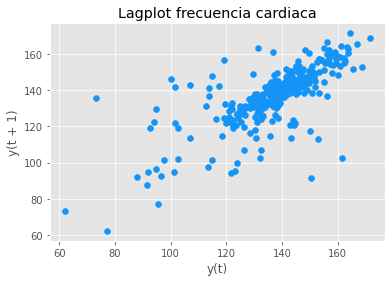

In [ ]:
lag_plot(data2,c=azul)
plt.title("Lagplot frecuencia cardiaca");

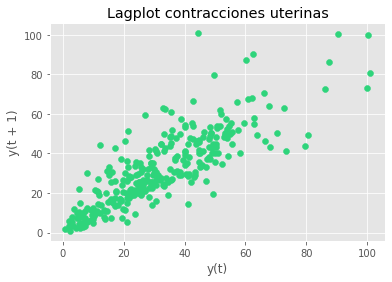

In [ ]:
lag_plot(data3,c=verde)
plt.title("Lagplot contracciones uterinas");

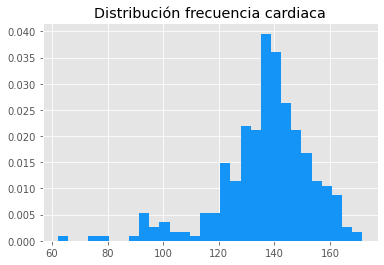

In [ ]:
plt.hist(data2,bins=30,density=True,color=azul)
plt.title("Distribución frecuencia cardiaca");

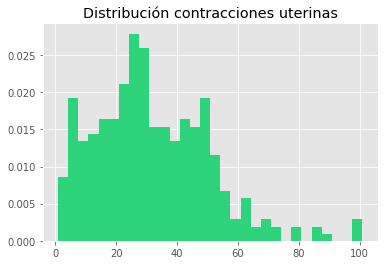

In [ ]:
plt.hist(data3,bins=30,density=True,color=verde)
plt.title("Distribución contracciones uterinas");

In [ ]:
df = pd.concat([data2, data3], axis=1)


In [ ]:
df["FC5min"]=df.FC.rolling(25).mean()

In [ ]:
df["FC10min"]=df.FC.rolling(50).mean()

In [ ]:
#Registro con taquicardia mayor a 160 lpm
len(df.FC10min[df.FC10min>160])

0

In [ ]:
#Registro con taquicardia mayor a 160 lpm
len(df.FC10min[df.FC10min<110])

0

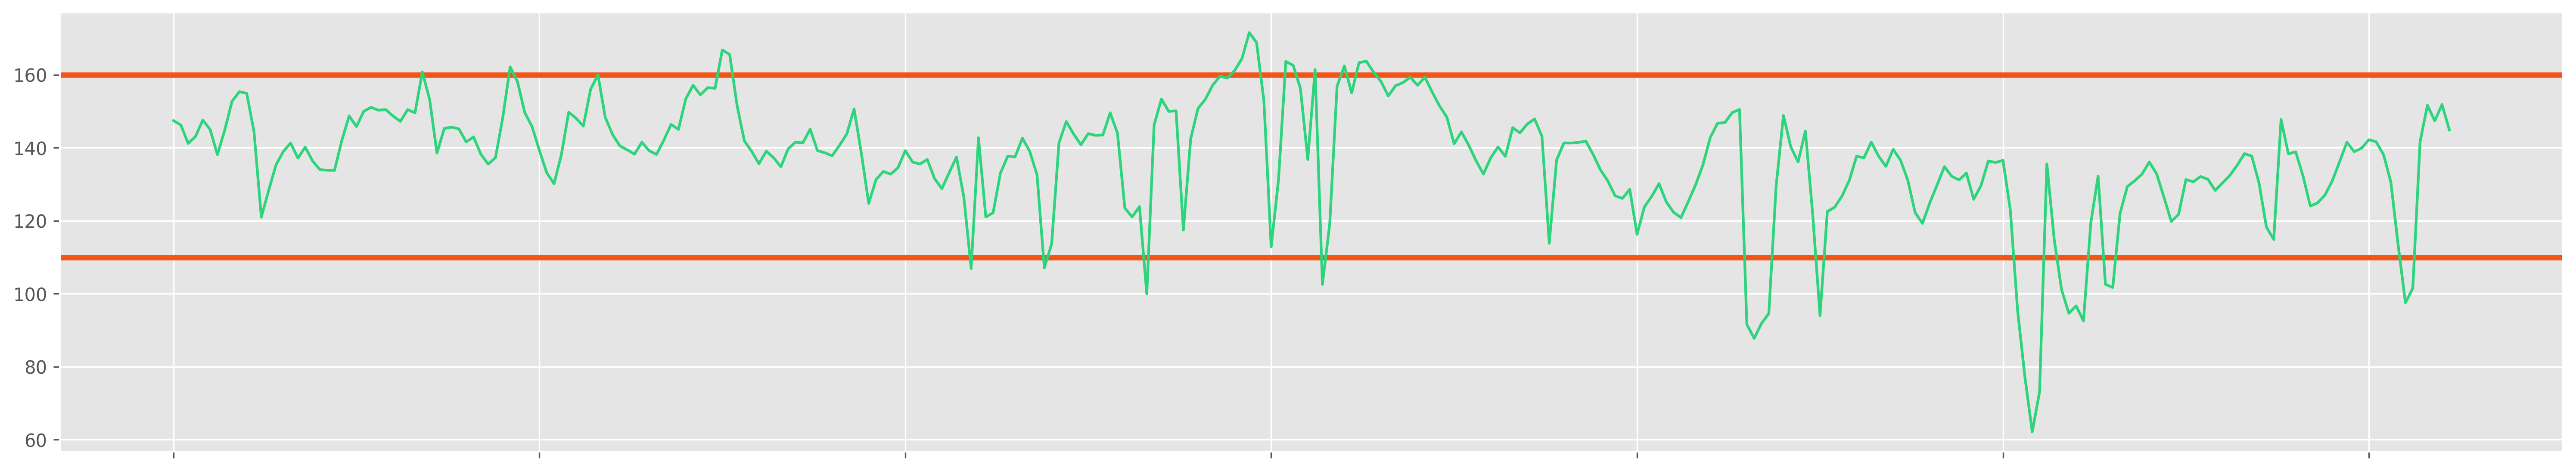

In [ ]:
plt.figure(dpi=300)
plt.axhline(y=160,linewidth=3, color=rojo)
plt.axhline(y=110,linewidth=3, color=rojo)
data2.plot(figsize=(25,5),color=verde);

In [ ]:
promedio_recortado=ss.trim_mean(data2,0.1)
promedio_recortado

138.42126186561478

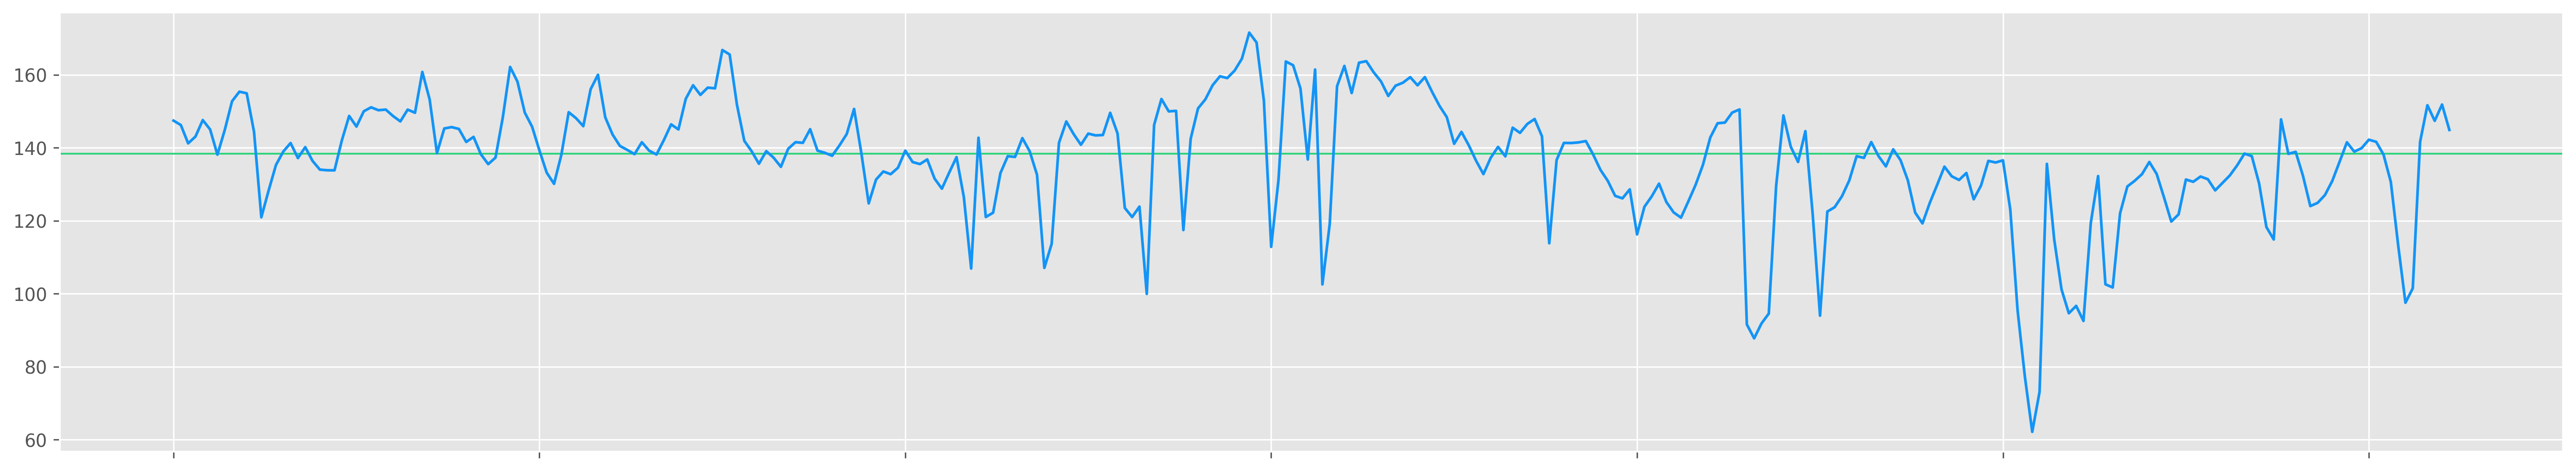

In [ ]:
plt.figure(dpi=300)
plt.axhline(y=promedio_recortado,linewidth=1, color=verde)
data2.plot(figsize=(25,5),color=azul,title="FCF");

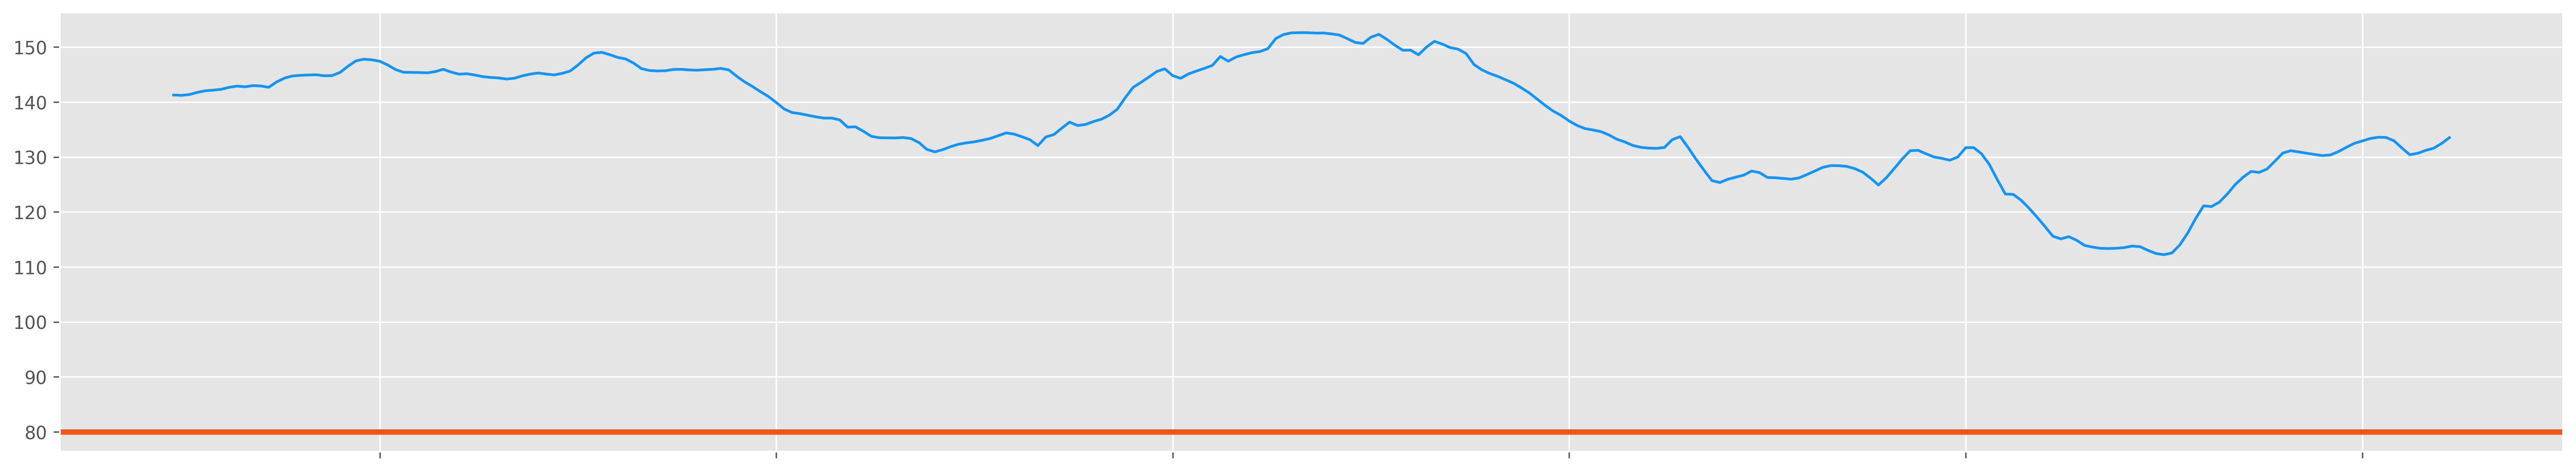

In [ ]:
plt.figure(dpi=300)
plt.axhline(y=80,linewidth=3, color=rojo)
df.FC5min.plot(figsize=(25,5),color=azul);

In [ ]:
##Desaceleraciones prolongadas, FC menor a 80 lpm durante más de 5 minutos
if len(df.FC5min[df.FC5min<80])>0:
  print("Existe una desaceleración prolongada")
else:
  print("No encontramos desaceleraciones prolongadas")

No encontramos desaceleraciones prolongadas


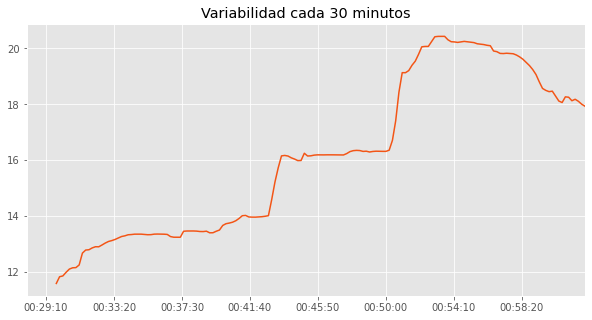

In [ ]:
#Variabilidad FC 30 minutos mayor a 25 lmp se denomina variabilidad aumentada
variabilidad_aumentada=data2.rolling(150).std()
variabilidad_aumentada[140:].plot(color=rojo,figsize=(10,5),title="Variabilidad cada 30 minutos");

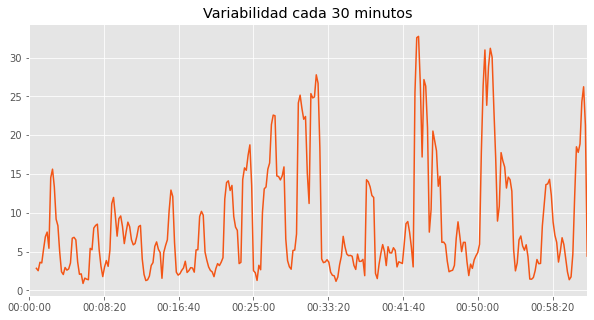

In [ ]:
#Variabilidad FC por minuto
variabilidad_aumentada=data2.rolling(5).std()
variabilidad_aumentada.plot(color=rojo,figsize=(10,5),title="Variabilidad cada 30 minutos");

In [ ]:
##Se realiza prueba con Prophet pero se descartan resultados porque el método utilizado por la liberaría descarta datos que pueden alterar la interpretación del estudio
from fbprophet import Prophet

In [ ]:
ds=pd.date_range(start=0, periods=14938, freq='0.25S')
y=data.FC
test=pd.DataFrame({"ds":ds,"y":y})
test

,ds,y
00:00:00,1970-01-01 00:00:00.000,150.50
00:00:00.250000,1970-01-01 00:00:00.250,150.50
00:00:00.500000,1970-01-01 00:00:00.500,151.00
00:00:00.750000,1970-01-01 00:00:00.750,151.25
00:00:01,1970-01-01 00:00:01.000,151.25
...,...,...
01:02:13.250000,1970-01-01 01:02:13.250,145.00
01:02:13.500000,1970-01-01 01:02:13.500,145.00
01:02:13.750000,1970-01-01 01:02:13.750,145.00
01:02:14,1970-01-01 01:02:14.000,144.50


In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


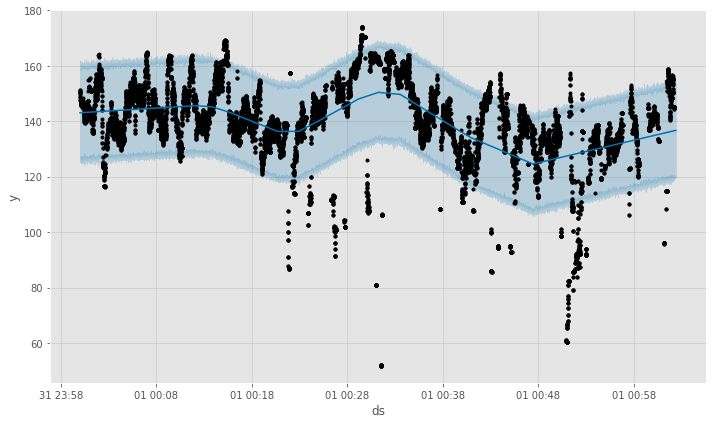

In [ ]:
future = m.make_future_dataframe(periods=10, freq='S')
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:

data.drop(0,inplace=True)
data.drop("'Elapsed time'",axis=1,inplace=True)
data.columns=["FC","UC"]
index=pd.to_timedelta(np.arange(0,len(data)/4,0.25), unit='s')
data.set_index(index,inplace=True)
data.FC=data.FC.astype(float)
data.UC=data.UC.astype(float)
data["first_zeros_UC"]=data.UC.cummax()
data["last_zeros_UC"]=data.UC.iloc[::-1].cummax().iloc[::-1]
data["first_zeros_FC"]=data.FC.cummax()
data["last_zeros_FC"]=data.FC.iloc[::-1].cummax().iloc[::-1]
data["remove"]=data.iloc[:,2:].all(axis=1)
data=data[data.remove==True]
data.FC[data.FC==0]=np.nan